In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../"))

from sky import *

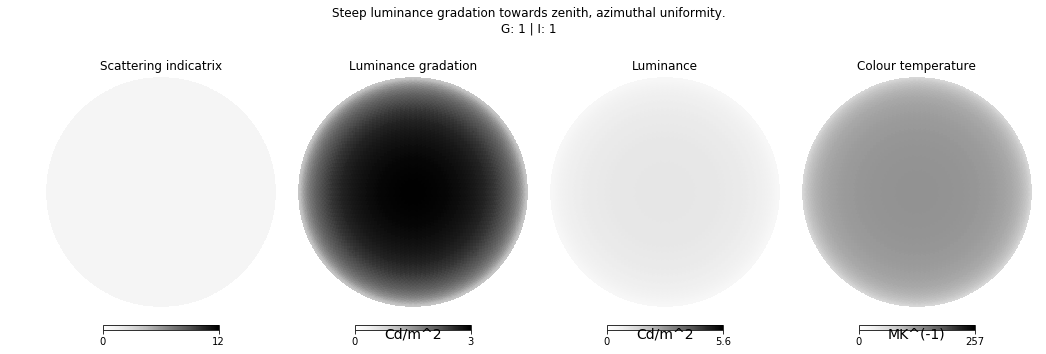

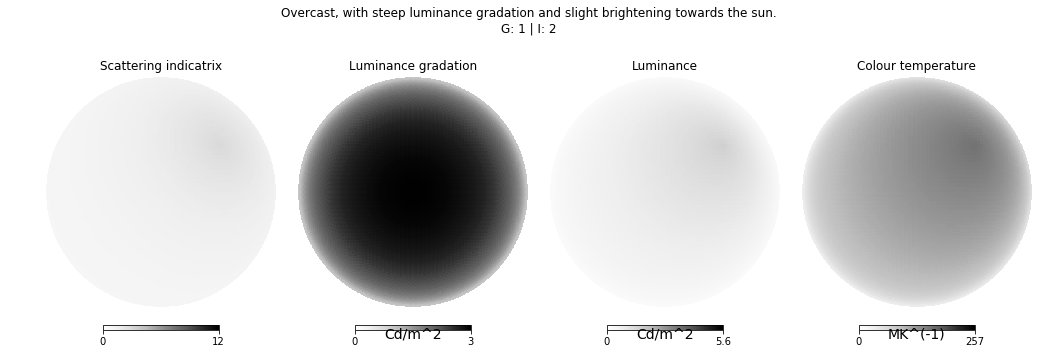

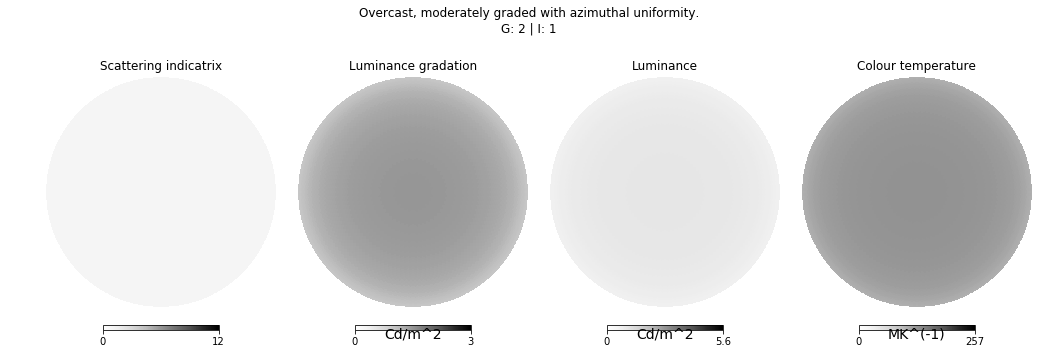

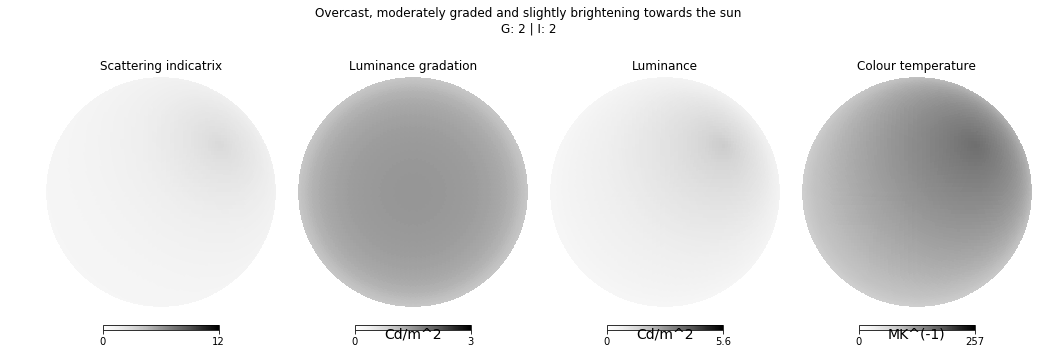

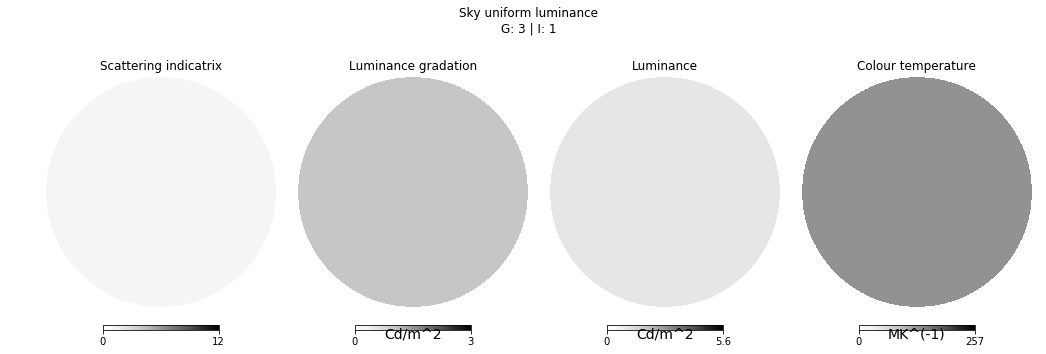

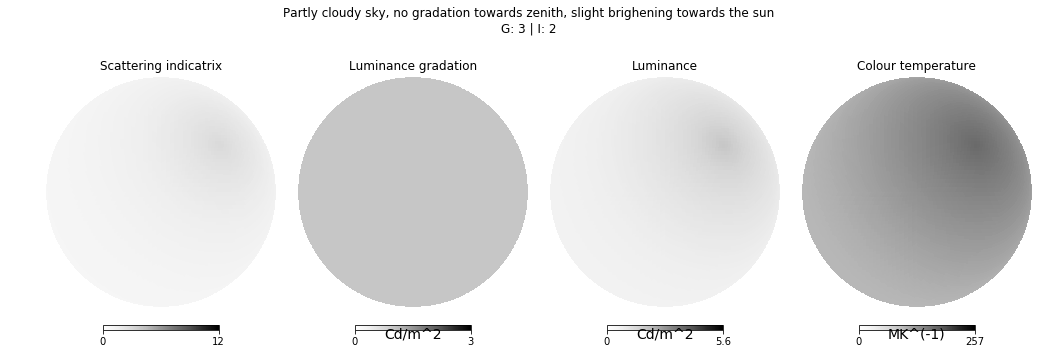

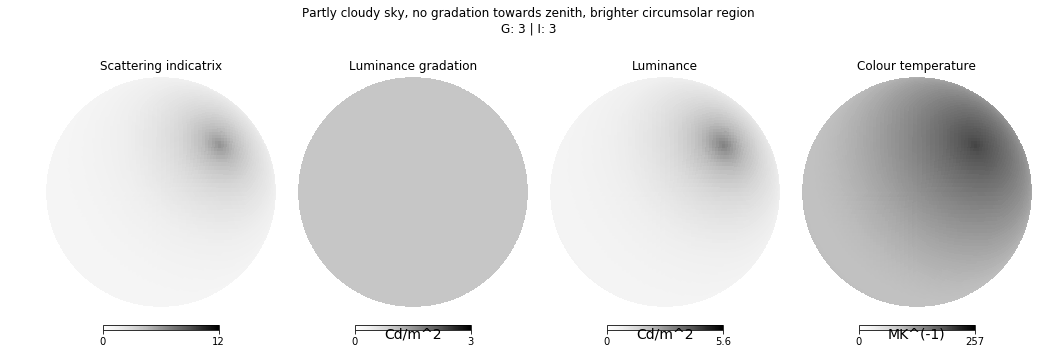

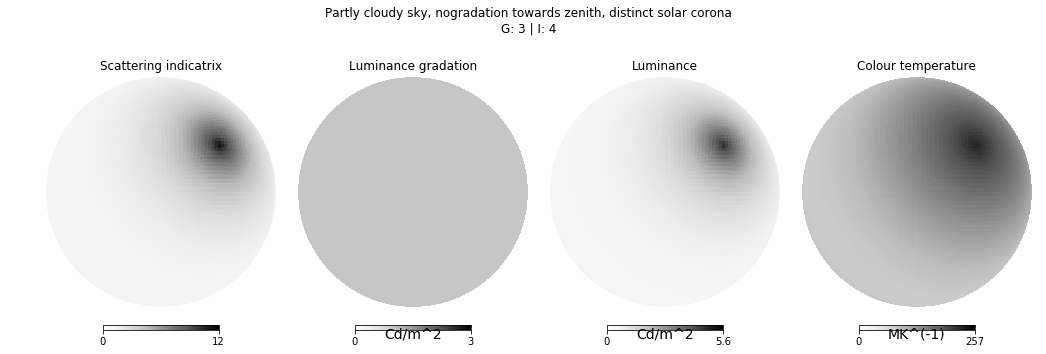

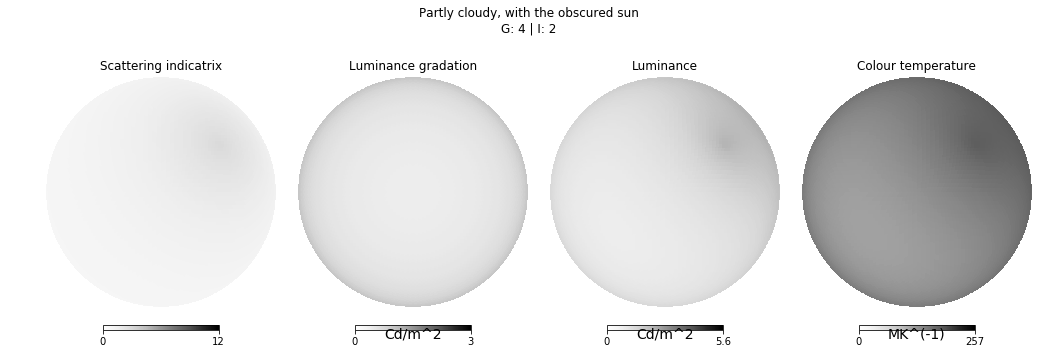

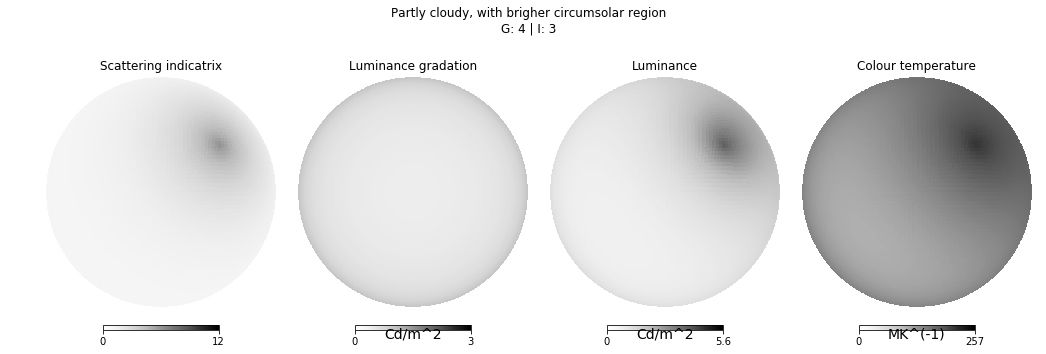

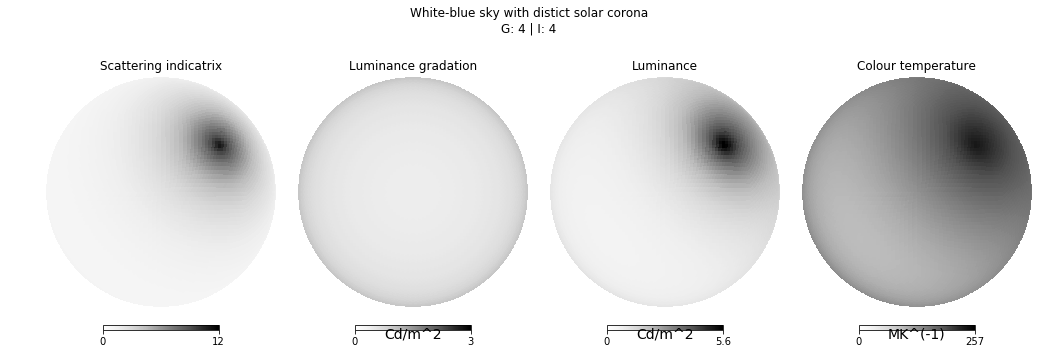

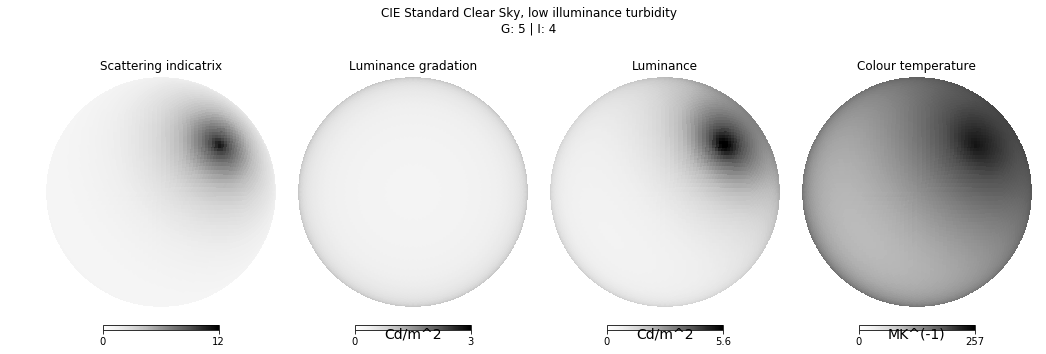

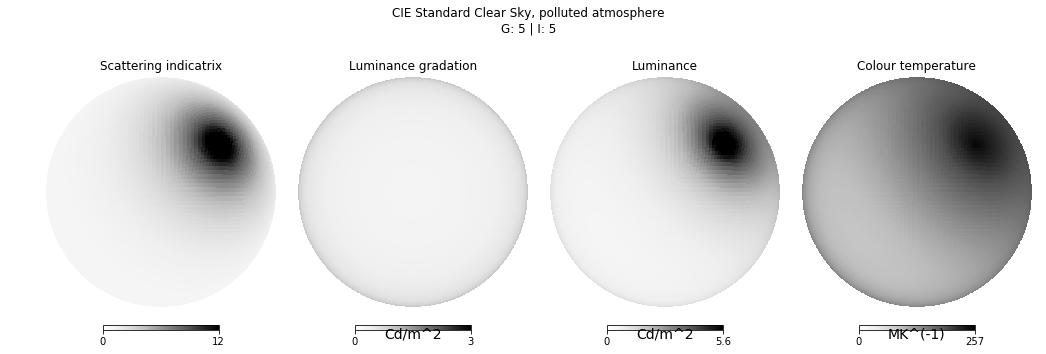

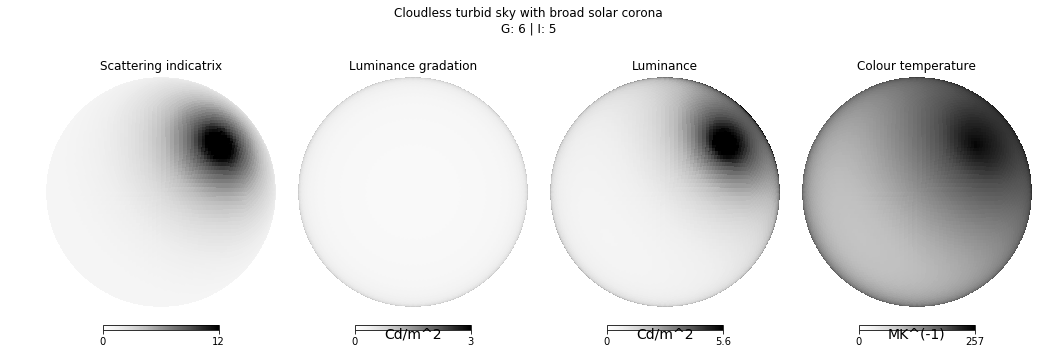

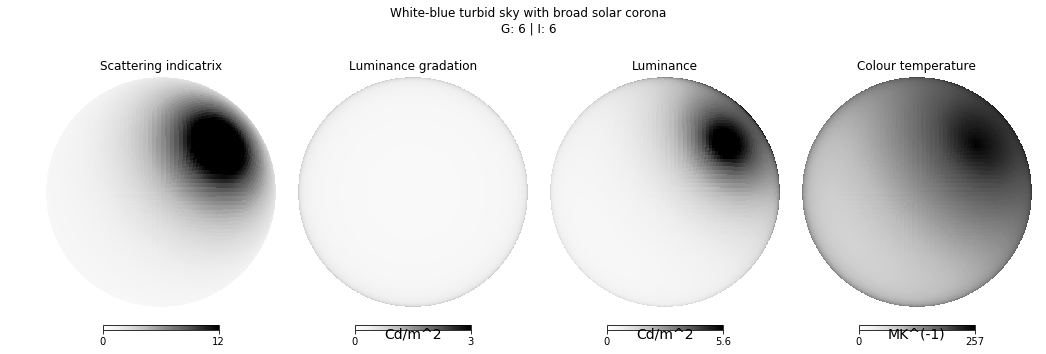

In [2]:
%matplotlib inline

for st in xrange(1, 16):
    sky = SkyModel(sky_type=st)
    sky.generate()
    t = "%s\nG: %d | I: %d" % (sky.description[-1], sky.gradation, sky.indicatrix)
    SkyModel.plot_luminance(sky=sky, fig=st, title=t)
plt.show()

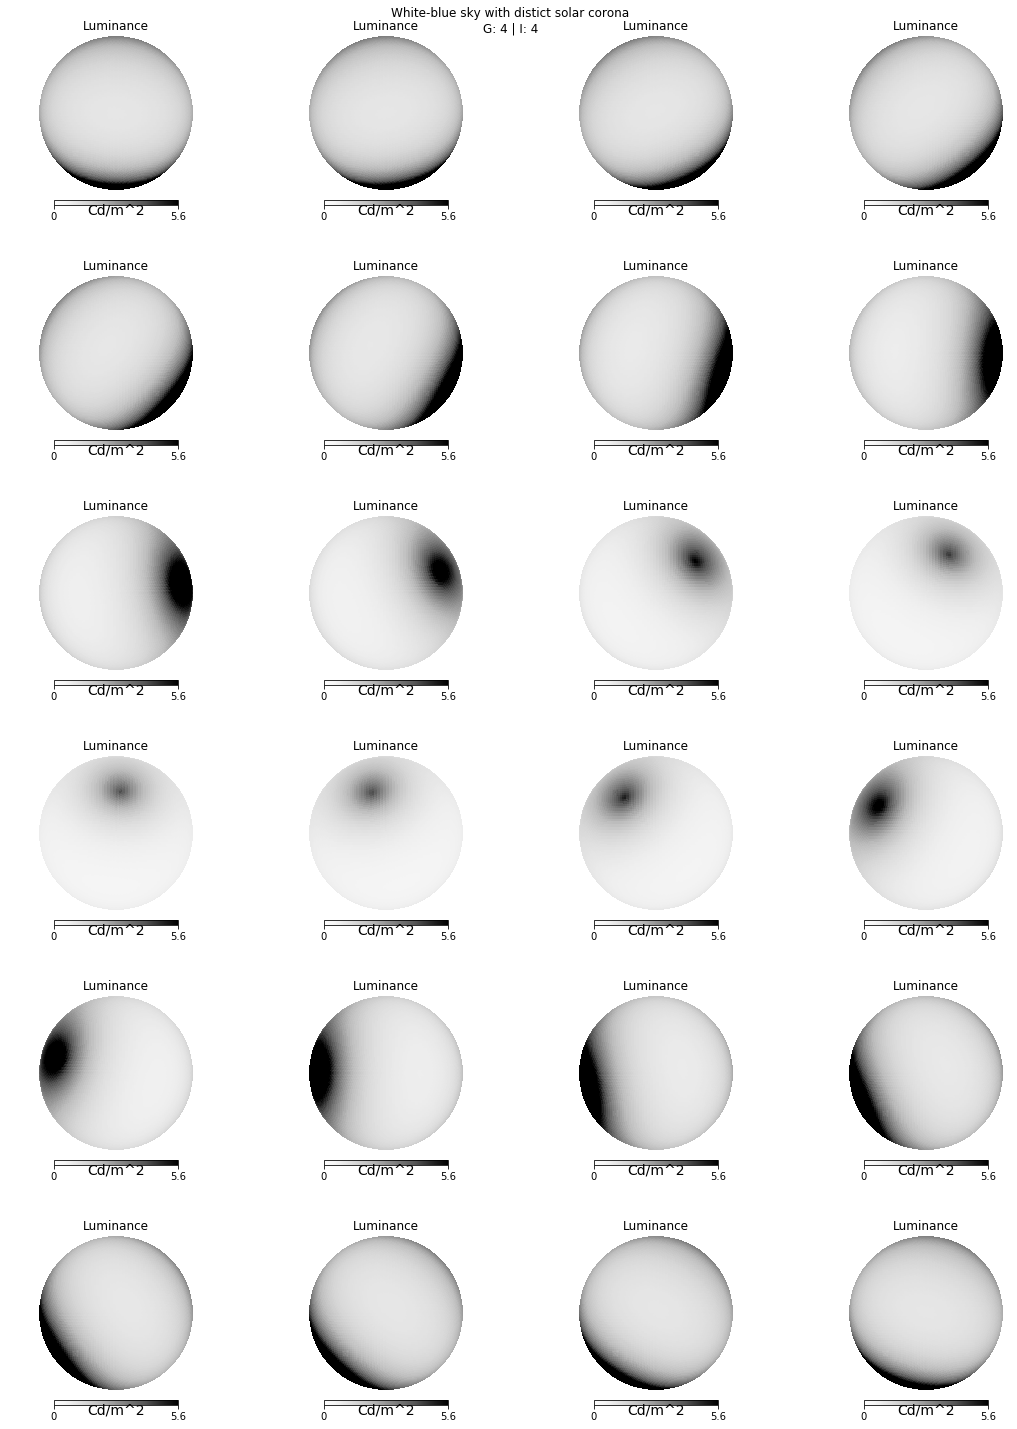

In [3]:
from datetime import datetime

sky = SkyModel()

plt.figure(1, figsize=(15, 20))
for h in xrange(24):
    sky.obs.date =  datetime(2017, 6, 21, h, 0, 0)
    sky.generate()
    t = "%s\nG: %d | I: %d" % (sky.description[-1], sky.gradation, sky.indicatrix)
    SkyModel.plot_luminance(sky=sky, fig=1, sub=(6,4,h+1), mode="0010", title=t)
plt.show()

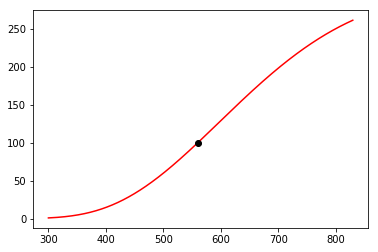

0.930482705616 261.602339766


In [4]:
def spectral_power(lam):
    a = 100. * np.power(560. / lam, 5)
    b = np.exp((1.435 * np.power(10, 7)) / (2848 * 560)) - 1
    c = np.exp((1.435 * np.power(10, 7)) / (2848 * lam)) - 1
    return a * b / c

x = np.linspace(300, 830, 1000, endpoint=True)
y = spectral_power(x)
plt.plot(x, y, 'r-')
plt.plot(560, spectral_power(560), 'ko')
plt.show()

print y.min(), y.max()

In [5]:
import colorpy as cp
import colorpy.illuminants

T_K = 5778    # sun illuminant
sun_spectrum = colorpy.illuminants.get_blackbody_illuminant(T_K)
cp.plots.spectrum_plot(sun_spectrum)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices